In [1]:
import os
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
os.environ["KERAS_BACKEND"] = "torch"
import keras
from datamodules import data_processors

In [2]:
path_archivo = "../input_data/combi_500_100.csv"
path_rand1 = "../input_data/uni_cp_1.csv"
path_rand2 = "../input_data/uni_cp_2.csv"
path_rand3 = "../input_data/uni_cp_3.csv"
path_rand4 = "../input_data/uni_cp_4.csv"
path_rand5 = "../input_data/uni_cp_5.csv"
datos_combi  = pd.read_csv(path_archivo)
datos_rand1 = pd.read_csv(path_rand1)
datos_rand2 = pd.read_csv(path_rand2)
datos_rand3 = pd.read_csv(path_rand3)
datos_rand4 = pd.read_csv(path_rand4)
datos_rand5 = pd.read_csv(path_rand5)
path_to_current_model = "models/isotropico_act_custom_3.keras" # colocar "none" si quiere entrenar un modelo

In [3]:
datos_rand1.head()

,phi_K,eta,beta,eig_0,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,...,eig_13,eig_14,eig_15,eig_16,eig_17,eig_18,eig_19,Parallelepiped,Cylinder,Ellipsoid
0,0.125895,0.898143,1.591806,0.031749,1.294655,3.127039,5.615245,5.970742,8.054486,10.044170,...,25.940142,27.651893,31.884634,32.598213,42.472368,44.832121,44.864811,1,0,0
1,0.992284,1.877811,1.746430,1.334671,1.402422,2.148936,2.607121,3.248163,3.389296,3.549552,...,6.833653,7.702004,7.754664,8.325881,8.762108,9.016247,9.776120,1,0,0
2,1.144654,0.737189,2.996673,0.224183,1.108690,2.335793,4.800912,5.351783,5.719806,9.944617,...,41.782412,42.079959,42.402281,43.662518,44.339435,47.626037,49.234004,1,0,0
3,0.342128,1.479980,1.172628,0.146093,1.980160,3.718773,4.893354,5.723994,6.526462,6.954708,...,16.222019,16.529670,17.604798,17.897453,20.061791,25.946964,28.862689,1,0,0
4,0.820571,1.273627,1.306503,0.305105,1.224533,3.995201,4.104588,4.329762,6.219294,6.920863,...,14.445828,16.457301,17.106037,18.350513,18.884295,19.400193,20.926278,1,0,0


In [4]:
datos_combi = datos_combi.sort_values(by=["eta", "beta", "phi_K"]).reset_index(drop=True)

In [5]:
N_eig = 5
features = ["eta", "beta"] + list(map(lambda x: "eig_" + str(x+1), range(N_eig)))
target = "phi_K"

In [6]:
datos_combi = data_processors.preprocess_data(datos_combi, N_eig, target)
datos_rand1 = data_processors.preprocess_data(datos_rand1, N_eig, target)
datos_rand2 = data_processors.preprocess_data(datos_rand2, N_eig, target)
datos_rand3 = data_processors.preprocess_data(datos_rand3, N_eig, target)
datos_rand4 = data_processors.preprocess_data(datos_rand4, N_eig, target)
datos_rand5 = data_processors.preprocess_data(datos_rand5, N_eig, target)

In [7]:
datos_rand1.head()

,phi_K,eig_0,eta,beta,eig_1,eig_2,eig_3,eig_4,eig_5
0,0.080147,0.031749,0.898143,1.591806,0.772406,0.414020,0.556884,0.940460,0.741294
1,0.631707,1.334671,1.877811,1.746430,0.713052,0.652612,0.824256,0.802645,0.958359
2,0.728709,0.224183,0.737189,2.996673,0.901966,0.474652,0.486531,0.897068,0.935658
3,0.217805,0.146093,1.479980,1.172628,0.505010,0.532477,0.759964,0.854885,0.877044
4,0.522392,0.305105,1.273627,1.306503,0.816638,0.306501,0.973350,0.947994,0.696182


In [8]:
metadata_temporal = {"combi": len(datos_combi), "rand1": len(datos_rand1), "rand2": len(datos_rand2)}
print(metadata_temporal)

{'combi': 52500, 'rand1': 49996, 'rand2': 49994}


In [9]:
N_phi_K = 500
N_datos = len(datos_combi)
N_partes = int(N_datos/N_phi_K)
print(N_partes)

105


In [10]:
X_combi = datos_combi[features]
X_rand1 = datos_rand1[features]
X_rand2 = datos_rand2[features]
X_rand3 = datos_rand3[features]
X_rand4 = datos_rand4[features]
X_rand5 = datos_rand5[features]
y_combi = datos_combi[target]
y_rand1 = datos_rand1[target]
y_rand2 = datos_rand2[target]
y_rand3 = datos_rand3[target]
y_rand4 = datos_rand4[target]
y_rand5 = datos_rand5[target]

In [11]:
X_train = pd.concat((X_rand2, X_rand3, X_rand4), axis = 0)
y_train = pd.concat((y_rand2, y_rand3, y_rand4), axis = 0)

In [12]:
corr_mat = X_train.select_dtypes(include=['number']).corr()
print(corr_mat)

            eta      beta     eig_1     eig_2     eig_3     eig_4     eig_5
eta    1.000000  0.000017  0.376087  0.224659  0.336107  0.494697  0.214494
beta   0.000017  1.000000  0.377325  0.522487 -0.062890  0.160456  0.550522
eig_1  0.376087  0.377325  1.000000 -0.094061  0.042268  0.331842  0.359534
eig_2  0.224659  0.522487 -0.094061  1.000000 -0.345662  0.128224  0.324347
eig_3  0.336107 -0.062890  0.042268 -0.345662  1.000000 -0.123927  0.063295
eig_4  0.494697  0.160456  0.331842  0.128224 -0.123927  1.000000  0.017558
eig_5  0.214494  0.550522  0.359534  0.324347  0.063295  0.017558  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

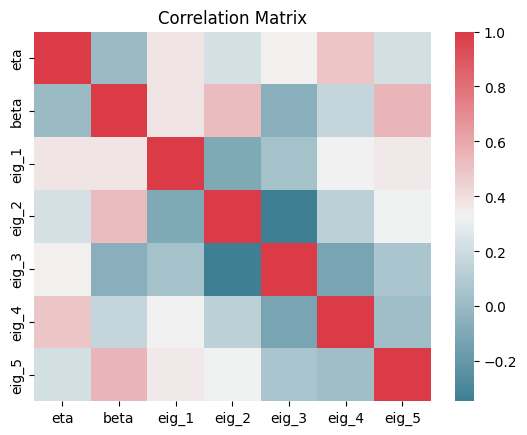

In [13]:
sns.heatmap(corr_mat, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix")

In [14]:
torch.cuda.get_device_properties(torch.device("cuda"))

_CudaDeviceProperties(name='AMD Radeon RX 6600M', major=10, minor=3, gcnArchName='gfx1030', total_memory=8176MB, multi_processor_count=14)

In [15]:
n_pow = 20
def custom_activation(x):
    return (1/n_pow) * torch.log((1 + torch.exp(n_pow * x)) / (1 + torch.exp(n_pow * (x - 1))))
#fin función

# Wrap the function in a Keras custom layer
@keras.saving.register_keras_serializable()
class CustomActivationLayer(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CustomActivationLayer, self).__init__(**kwargs)
    
    def call(self, inputs):
        # Ensure inputs are Torch tensors
        inputs = torch.tensor(inputs) if not isinstance(inputs, torch.Tensor) else inputs
        return custom_activation(inputs)
    #fin función
#fin clase

def crear_modelo_de_regresion(lr_var, n_input_data):    
    modelo = keras.models.Sequential()
    modelo.add(keras.layers.Dense(64, activation = 'relu', input_shape = (n_input_data,)))
    modelo.add(keras.layers.Dense(32, activation = 'relu'))
    modelo.add(keras.layers.Dense(16, activation = 'relu'))
    modelo.add(keras.layers.Dense(4, activation = 'relu'))
    modelo.add(keras.layers.Dense(1))
    modelo.add(CustomActivationLayer())
    modelo.compile(optimizer = keras.optimizers.RMSprop(learning_rate = lr_var), loss = 'mse', metrics = ['mae']) #RMSprop
    return modelo

In [16]:
k = 4 #4 sets de validación
n_muestras_val = len(X_train) // k
epocas = 100
all_history = []

In [17]:
if path_to_current_model == "none":
    modelo = crear_modelo_de_regresion(0.001, len(features))
    history = modelo.fit(X_train, y_train, epochs = epocas, batch_size=16, 
                            validation_data = (X_rand5, y_rand5))
else:
    modelo = keras.models.load_model(path_to_current_model)
#fin if 

In [18]:
mets_train = data_processors.get_metrics(X_train, y_train, modelo)
mets_val = data_processors.get_metrics(X_rand5, y_rand5, modelo)
mets_rand1 = data_processors.get_metrics(X_rand1, y_rand1, modelo)

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [19]:
print("Train: ", mets_train)
print("Val: ", mets_val)
print("Test: ", mets_rand1)

Train:  {'R2': 0.9731700469843184, 'RMSE': np.float64(0.047320555232169194), 'MAE': np.float64(0.030554972995846436)}
Val:  {'R2': 0.9719367867953681, 'RMSE': np.float64(0.04847890222689015), 'MAE': np.float64(0.03081936026217574)}
Test:  {'R2': 0.972967157209002, 'RMSE': np.float64(0.04754826078347165), 'MAE': np.float64(0.03062527347254805)}


In [20]:
path_archivo_kg = "../input_data/KG_random.csv"
str_to_ndarray = lambda x: np.fromstring(x, sep=' ')
datos_kg_random = pd.read_csv(path_archivo_kg, converters={'eigvals': str_to_ndarray})
datos_kg_random = datos_kg_random[datos_kg_random["shape"] == "parallelepiped"].copy()
datos_kg_random_std = data_processors.transform_full_sized_data_isotropic(datos_kg_random, N_eig)

In [21]:
datos_kg_random_std

,K,G,dx,dy,dz,shape,eig_0,eig_1,eig_2,eig_3,eig_4,eig_5,phi_K,eta,beta
98304,1.137564,0.925310,0.345791,0.722980,0.454774,parallelepiped,0.412707,0.524816,0.664249,1.242484,1.352123,1.526493,0.682866,1.337486,2.600392
98305,5.500412,5.321621,0.402060,0.999638,0.807374,parallelepiped,1.582053,2.487298,4.468703,4.838954,5.974758,6.092165,0.768879,1.468138,1.848136
98306,3.375617,3.980662,0.429638,0.851665,0.529495,parallelepiped,1.910220,2.281837,2.722189,5.154925,5.985199,6.880495,0.867462,1.350259,2.726644
98307,1.448420,4.074601,0.151318,0.942633,0.328977,parallelepiped,0.077098,0.249390,0.259526,0.483552,0.808482,1.025586,1.229252,0.733530,1.724437
98308,0.351677,5.407791,0.446276,0.792512,0.989446,parallelepiped,0.665386,1.100423,1.220930,1.825798,2.004655,2.115424,1.505856,1.486674,2.051426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131067,0.603325,3.002608,0.720661,0.439132,0.152189,parallelepiped,0.138335,0.260256,0.492664,0.812795,0.834834,0.876376,1.372503,1.145569,1.334456
131068,2.302202,2.474801,0.132153,0.607512,0.605882,parallelepiped,0.140488,0.296209,0.339297,0.719497,0.721766,1.428381,0.821514,1.591347,0.859013
131069,4.789391,3.091901,0.174914,0.402842,0.230977,parallelepiped,1.185878,1.416827,1.833425,3.694734,4.251125,4.515988,0.573257,1.247024,2.592575
131070,0.920026,0.420177,0.185685,0.716565,0.322597,parallelepiped,0.054970,0.067623,0.107235,0.267023,0.267814,0.273033,0.428413,0.958174,2.089119


In [22]:
datos_kg_random_copy = data_processors.preprocess_data(datos_kg_random_std, N_eig, target, opt = False)

In [23]:
datos_kg_random_copy

,phi_K,eig_0,eta,beta,eig_1,eig_2,eig_3,eig_4,eig_5
98304,0.434726,0.412707,1.337486,2.600392,0.786383,0.790090,0.534614,0.918914,0.885771
98305,0.489483,1.582053,1.468138,1.848136,0.636053,0.556604,0.923485,0.809900,0.980728
98306,0.552244,1.910220,1.350259,2.726644,0.837142,0.838236,0.528075,0.861279,0.869879
98307,0.782566,0.077098,0.733530,1.724437,0.309145,0.960942,0.536709,0.598099,0.788312
98308,0.958658,0.665386,1.486674,2.051426,0.604664,0.901299,0.668710,0.910779,0.947638
...,...,...,...,...,...,...,...,...,...
131067,0.873763,0.138335,1.145569,1.334456,0.531536,0.528263,0.606136,0.973601,0.952599
131068,0.522992,0.140488,1.591347,0.859013,0.474287,0.873008,0.471576,0.996856,0.505303
131069,0.364947,1.185878,1.247024,2.592575,0.836996,0.772776,0.496226,0.869119,0.941350
131070,0.272736,0.054970,0.958174,2.089119,0.812896,0.630602,0.401596,0.997046,0.980887


In [24]:
X_test3 = datos_kg_random_copy[features]
y_test3 = datos_kg_random_copy[target]

In [25]:
metrs3 = data_processors.get_metrics(X_test3, y_test3, modelo)

1024/1024 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [26]:
print("Datos KG_random Julián: ", metrs3)

Datos KG_random Julián:  {'R2': 0.9666285026412882, 'RMSE': np.float64(0.04270353182371587), 'MAE': np.float64(0.030113825661510253)}


In [27]:
mets_combi = data_processors.get_metrics(X_combi, y_combi, modelo)

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [28]:
print("Mis datos combinatoriales: ", mets_combi)

Mis datos combinatoriales:  {'R2': 0.9768082457412871, 'RMSE': np.float64(0.043905698004870625), 'MAE': np.float64(0.031116388886704666)}


In [29]:
if path_to_current_model == "none":
    modelo.save("models/isotropico_act_custom_4.keras")
#fin if 

In [30]:
path_semiexp = "../input_data/KG_semiexp.csv"
datos_seexp = pd.read_csv(path_semiexp)
datos_seexp.head()

,phi_K,eta,beta,eig_0,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,...,eig_13,eig_14,eig_15,eig_16,eig_17,eig_18,eig_19,Parallelepiped,Cylinder,Ellipsoid
0,0.358691,0.263806,2.674015,0.002138,1.559783,7.433072,11.010617,11.099329,27.467240,36.616132,...,333.861874,468.431730,521.143351,585.047597,606.743064,877.646789,1310.107517,1,0,0
1,0.358691,0.263993,2.892086,0.002476,1.265481,7.353209,9.090068,10.087484,26.820308,32.268547,...,294.476409,431.922918,479.156885,508.630906,535.225772,814.017220,1259.706436,1,0,0
2,0.358691,0.400177,3.045061,0.013527,1.088295,4.343095,6.603833,7.074639,13.697794,18.561007,...,124.718264,185.911969,203.355272,208.974344,218.917350,257.672087,280.667061,1,0,0
3,0.358691,0.402585,3.141043,0.014468,1.000481,4.123985,6.539009,6.541562,12.976990,17.624350,...,117.682811,176.793479,194.647457,194.678789,207.248362,251.601696,251.723742,1,0,0
4,0.358691,0.254159,2.697156,0.001877,1.527850,7.464761,10.966756,11.729615,27.729201,38.811472,...,354.240574,499.781676,541.513430,612.463982,644.398190,938.188869,1506.517943,1,0,0


In [31]:
datos_seexp = data_processors.preprocess_data(datos_seexp, N_eig, target)
datos_seexp.head()

,phi_K,eig_0,eta,beta,eig_1,eig_2,eig_3,eig_4,eig_5
0,0.22835,0.002138,0.263806,2.674015,0.641115,0.209844,0.675082,0.992007,0.404093
1,0.22835,0.002476,0.263993,2.892086,0.790213,0.172099,0.808928,0.901123,0.376114
2,0.22835,0.013527,0.400177,3.045061,0.918869,0.250580,0.657663,0.933452,0.516480
3,0.22835,0.014468,0.402585,3.141043,0.999520,0.242600,0.630674,0.999610,0.504089
4,0.22835,0.001877,0.254159,2.697156,0.654515,0.204675,0.680672,0.934963,0.423006


In [32]:
X_seexp = datos_seexp[features]
y_seexp = datos_seexp[target]
mets_semiexp = data_processors.get_metrics(X_seexp, y_seexp, modelo)

688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [33]:
print(mets_semiexp)

{'R2': 0.7191941413030457, 'RMSE': np.float64(0.06475565662861768), 'MAE': np.float64(0.051897695631709935)}
